In [1]:
%load_ext autoreload
%autoreload 2

from perturbations import *
from representation import *
from ls import *
import jupyter_utils as utils

import numpy as np
import matplotlib.pyplot as plt
import tsplib95

In [ ]:
# generate the problem instance
n = 30  # number of cities
distance_matrix = random_distances(n)

print("Generated distances between cities:")
print(distance_matrix)

In [3]:
# load problem from the library
problem = tsplib95.load("./archives/bayg29.tsp/bayg29.tsp")
#  ./archives/bayg29.tsp/bayg29.tsp
n = problem.dimension
distance_matrix = utils.weights_to_matrix(problem.edge_weights)
print("size of matrix: ", n)
# best = 1610

size of matrix:  29


In [4]:
perturbation = perturb_switch
#           perturb_move
#           perturb_invert
#           perturb_switch

ls = ls_first_improvement

init_fn = better_init_wrapper(size=n, dist_matrix=distance_matrix)
#           random_init_wrapper(size=n)
#           better_init_wrapper(size=n,dist_matrix = distance_matrix)

# names for plt
name_perturb = "switch"
name_ls = "first-improve"
max_evals = 1_000_000

In [9]:
# inits
fitness = fitness_wrapper(distance_matrix)

# do the search here!
results = ls(
    fitness_fn=fitness,
    initialisation_fn=init_fn,
    perturbation_fn=perturbation,
    stop_cond=max_evals,
)

# separate and print results!
best_fitness = results["best_fitness"]
best_order = results["best_order"]
history = results["history"]
utils.print_results(results)

Best solution found:
[ 5 27  0 23  7 26 22  6 24 10 21 16 13 17 14  3 18 15 12  9 19  1 20 28
  2 25  4  8 11]
With fitness:  1634.0
Total steps taken:  3546


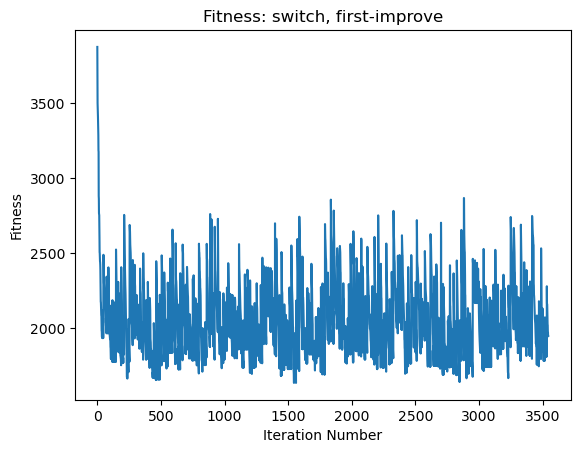

In [10]:
fitness = [iteration["fitness"] for iteration in history]
utils.simple_graph(
    fitness,
    "Iteration Number",
    "Fitness",
    f"Fitness: {name_perturb}, {name_ls}",
)

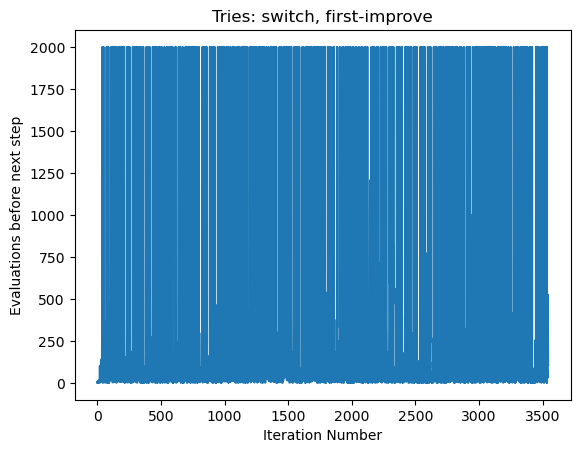

In [11]:
tries = [iteration["local_evals"] for iteration in history]
utils.simple_graph(
    tries,
    "Iteration Number",
    "Evaluations before next step",
    f"Tries: {name_perturb}, {name_ls}",
)

### ls - try all permutations, select best for the next step

In [25]:
# parallel versions compute all possible permutations in every step

perturbation = parallel_switch
#           parallel_move
#           parallel_switch
#           parallel_invert

ls = ls_best_improvement

init_fn = better_init_wrapper(size=n, dist_matrix=distance_matrix)
#           random_init_wrapper(size=n)

max_steps = 200
# inits
fitness = fitness_wrapper(distance_matrix)

In [13]:
# do the search here!
results = ls(
    fitness_fn=fitness,
    initialisation_fn=init_fn,
    perturbation_fn=perturbation,
    stop_cond=max_steps,
)

# separate and print results!
best_fitness = results["best_fitness"]
best_order = results["best_order"]
history = results["history"]
utils.print_results(results)

Best solution found:
[17 13 16 21 10 18 15 23  0 20  1 19  9 24  6 22 26  7 27  4 28  2 25  8
 11  5 12  3 14]
With fitness:  1871.0
Total steps taken:  200


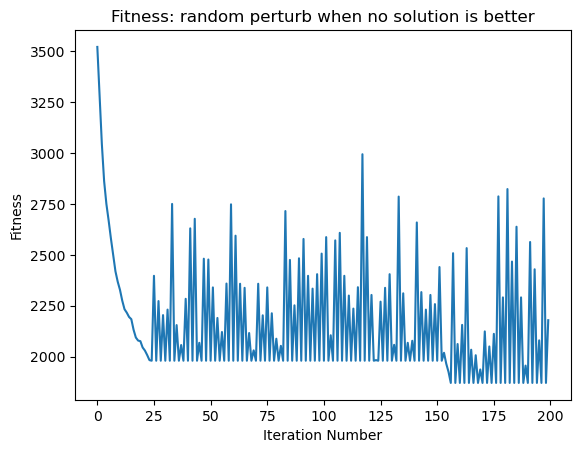

restarted:  87


In [14]:
fitness_list = [iteration["fitness"] for iteration in history]
utils.simple_graph(
    fitness_list,
    "Iteration Number",
    "Fitness",
    f"Fitness: random perturb when no solution is better",
)
restarts = [iteration["restart here"] for iteration in history]
num_restarts = sum(restarts)
print("restarted: ", num_restarts)